In [ ]:
# from google.cloud import storage

# client = storage.Client() 
# bucket = client.get_bucket('aug_data_july19') 
# blobs = bucket.list_blobs() 
# for blob in blobs: print(blob.name)

In [ ]:
!pip install opencv-python-headless

  Using cached opencv_python_headless-4.8.0.76-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)


In [ ]:
import numpy as np
import os
import tensorflow as tf
import cv2
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt

2023-08-24 16:31:11.570716: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 16:31:18.966609: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-24 16:31:33.974316: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-08-24 16:31:33.974674: W tensorflow/strea

In [ ]:
# # loading the files form the bucket
# import cv2 
# import numpy as np
# from google.cloud import storage
# client = storage.Client() 
# bucket = client.get_bucket('aug_data_july19') 
# blobs = bucket.list_blobs(prefix='Aug_Segmented_Jaundice_images/') 
# images = [] 
# for blob in blobs: 
#     image_bytes = blob.download_as_bytes() 
#     image_array = np.frombuffer(image_bytes, dtype=np.uint8) 
#     image = cv2.imdecode(image_array, cv2.IMREAD_COLOR) 
#     images.append(image)

In [ ]:
# blobs = bucket.list_blobs(prefix='Aug_Segmented_normal_images/') 
# normal_images = [] 
# for blob in blobs: 
#     image_bytes = blob.download_as_bytes() 
#     image_array = np.frombuffer(image_bytes, dtype=np.uint8) 
#     image = cv2.imdecode(image_array, cv2.IMREAD_COLOR) 
#     normal_images.append(image)

In [ ]:
# import json 
# bucket1 = storage.Client().get_bucket('aug_data_july19') 
# blob = bucket1.blob('export-data-Neonatal_Jaundice-2023-07-27T09:46:58.796883Z/image_classification_single_label/Neonatal_Jaundice_icn-1611428848505716736/data-00001-of-00001.jsonl') 
# jsonl_bytes = blob.download_as_bytes() 
# jsonl_string = jsonl_bytes.decode('utf-8')

# # loading the files from .jsonl file
# # image_uris = [] 
# # for line in jsonl_string.splitlines(): 
# #     data = json.loads(line) 
# #     image_uri = data['imageGcsUri'] 
# #     image_uris.append(image_uri)
    
# # images = [] 
# # for image_uri in image_uris: 
# #     blob = bucket.blob(image_uri) 
# #     image_bytes = blob.download_as_bytes() 
# #     image_array = np.frombuffer(image_bytes, dtype=np.uint8) 
# #     image = cv2.imdecode(image_array, cv2.IMREAD_COLOR) 
# #     images.append(image)

In [ ]:
# seperating the files according to their labels using .jsonl file
# images_normal = [] 
# images_abnormal = []
# for line in jsonl_string.splitlines(): 
#     data = json.loads(line) 
#     image_uri = data['imageGcsUri'] 
#     display_name = data['classificationAnnotation']['displayName'] 
#     blob = bucket.blob(image_uri) 
#     image_bytes = blob.download_as_bytes() 
#     image_array = np.frombuffer(image_bytes, dtype=np.uint8) 
#     image = cv2.imdecode(image_array, cv2.IMREAD_COLOR) 
#     if display_name == '0': 
#         images_normal.append(image) 
#     elif display_name == '1': 
#         images_abnormal.append(image) 

In [ ]:
# import cv2
# import gcsfs
# from google.cloud import storage

# # Set the input and output directories
# bucket_name = 'njn1'



In [ ]:
# # seperating the files matching thier file names in the bucket
# from google.cloud import storage
# import re 
# client = storage.Client()
# bucket = client.get_bucket('njn1')
# Normal =  []
# Jaundice = []
# input_dir1 = 'Morph_Normal'
# input_dir2 = 'Morph_Aug_Jaundice/'
# input_dir3 = 'Morph_Aug_Normal/'

# for blob in bucket.list_blobs(prefix=input_dir): # Get the blob name 
#     name = blob.name # Check if the name matches the prefix pattern 
#     if re.search(r'(Jaundice|normal)', name):
        
#                 # Append the blob to the corresponding list 
#         if 'Jaundice' in name: 
#              Jaundice.append(blob) 
#         elif 'normal' in name: 
#                 Normal.append(blob)
# # initialize a new list to store all blobs
# all_blobs = []

# # add the blobs from the Jaundice list to the new list
# all_blobs.extend(Jaundice)

# # add the blobs from the Normal list to the new list
# all_blobs.extend(Normal)
from google.cloud import storage
import re

client = storage.Client()
bucket = client.get_bucket('njn1')
Normal = []
Jaundice = []
input_dir1 = 'Morph_Normal'
input_dir2 = 'Morph_Aug_Jaundice/'
input_dir3 = 'Morph_Aug_Normal/'

for input_dir in [input_dir1, input_dir2, input_dir3]:
    for blob in bucket.list_blobs(prefix=input_dir):  # Get the blob name
        name = blob.name  # Check if the name matches the prefix pattern
        if re.search(r'(Jaundice|normal)', name):

            # Append the blob to the corresponding list
            if 'Jaundice' in name:
                Jaundice.append(blob)
            elif 'normal' in name:
                Normal.append(blob)

# initialize a new list to store all blobs
all_blobs = []

# add the blobs from the Jaundice list to the new list
all_blobs.extend(Jaundice)

# add the blobs from the Normal list to the new list
all_blobs.extend(Normal)



In [ ]:
len(all_blobs)

1402

In [ ]:
# for i in all_blobs:
#     print(i)

In [ ]:
# from PIL import Image
# from io import BytesIO

# # specify the desired size of the resized images
# new_size = (512, 512)

# # initialize a list to store the resized images
# resized_images = []

# # iterate over all blobs in the all_blobs list
# for blob in all_blobs:
#     # check if the blob name ends with '.png' or '.jpg'
#     if blob.name.endswith('.png') or blob.name.endswith('.jpg'):
#         # read the contents of the blob as bytes
#         data = blob.download_as_bytes()
        
#         # convert the bytes to a PIL Image object
#         image = Image.open(BytesIO(data))
        
#         # resize the image
#         image = image.resize(new_size)
#         image = np.array(image)
        
#         # append the resized image to the list of resized images
#         resized_images.append(image)




In [ ]:
# from google.cloud import storage
# import imgaug as ia
# from imgaug import augmenters as iaa
# import cv2
# import numpy as np
# from PIL import Image
# from io import BytesIO

# input_prefix = "Morphology_Jaundice/"

# ouput_prefix = "Morph_Aug_Jaundice/"
# # Define the number of augmented images you want per original image
# augmentation_factor = 20

# augmenter = iaa.Sequential([
#     iaa.Fliplr(0.5),  # Horizontal flips
#     iaa.Affine(rotate=(-10, 10)),  # Rotation
#     iaa.Affine(shear=(-5, 5)),  # Shear transformation
#     iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),  # Gaussian noise
#     iaa.Multiply((0.8, 1.2), per_channel=0.2),  # Color multiplication
#     iaa.LinearContrast((0.8, 1.2), per_channel=0.2),  # Contrast normalization
#     iaa.ElasticTransformation(alpha=10, sigma=1),  # Elastic transformation
# ])


# # Loop through each original segmented chest image in the GCS bucket
# for blob in bucket.list_blobs(prefix=input_prefix):
#     if blob.name.endswith(".jpg") or blob.name.endswith(".png"):
#         # Download the contents of the blob as a NumPy array representing an image
#         image = np.array(Image.open(BytesIO(blob.download_as_string())))
        
#         # Apply augmentation factor to each original image
#         for i in range(augmentation_factor):
#             augmented_image = augmenter(image=image)
            
#             # Construct the new filename by appending '_aug' and the index to the original filename
#             new_filename = blob.name.split("/")[-1].split(".")[0] + "_aug" + str(i) + ".jpg"
            
#             # Construct the save path by joining the augmented images prefix with the new filename
#             save_path = f"{ouput_prefix}{new_filename}"
            
#             # Save the PIL Image object to a bytes buffer in JPEG format
#             buffer = BytesIO()
#             Image.fromarray(augmented_image).save(buffer, format='JPEG')
            
#             # Upload the contents of the bytes buffer to a new blob in the GCS bucket with the specified save path
#             bucket.blob(save_path).upload_from_string(buffer.getvalue(), content_type='image/jpeg')


In [ ]:
# import matplotlib.pyplot as plt
# from PIL import Image
# from io import BytesIO

# # Get the first image from the Normal list
# image_blob = Normal[1]

# # Download the image data as a byte string
# image_data = image_blob.download_as_string()

# # Open the image data using Pillow
# image = Image.open(BytesIO(image_data))

# # Convert the image to a NumPy array
# image_array = np.array(image)

# # Display the image using matplotlib
# plt.imshow(image_array)
# plt.axis('off')
# plt.show()


In [ ]:
# # downloading the blobs and resizing
# import cv2
# normal_images = []
# Jaundice_images = []
# image_size = (512, 512)

# for blob in Normal: # Download the blob as bytes 
#     image_bytes = blob.download_as_bytes() # Decode the bytes into an array 
#     image_array = np.frombuffer(image_bytes, dtype=np.uint8) # Decode the array into an image 
#     image = cv2.imdecode(image_array, cv2.IMREAD_COLOR) # Resize the image 
#     image = cv2.resize(image, image_size) # Append the resized image to the list 
#     normal_images.append(image)
# for blob in Jaundice:# Download the blob as bytes 
#     image_bytes = blob.download_as_bytes() # Decode the bytes into an array 
#     image_array = np.frombuffer(image_bytes, dtype=np.uint8) # Decode the array into an image 
#     image = cv2.imdecode(image_array, cv2.IMREAD_COLOR) # Resize the image 
#     image = cv2.resize(image, image_size) # Append the resized image to the list 
#     Jaundice_images.append(image)

In [ ]:
# image_size = (512, 512)

# for i in range(len(normal_images)): 
#     normal_images[i] = cv2.resize(files_0[i], image_size)
# for i in range(len(images)): 
#     images[i] = cv2.resize(files_1[i], image_size)

In [ ]:
from PIL import Image
from io import BytesIO
new_size = (512, 512)
# initialize lists to store the normal and jaundice images
Normal_images = []
Jaundice_images = []

# iterate over all blobs in the all_blobs list
for blob in all_blobs:
    # check if the blob name ends with '.png' or '.jpg'
    if blob.name.endswith('.png') or blob.name.endswith('.jpg'):
        # read the contents of the blob as bytes
        data = blob.download_as_bytes()
        
        # convert the bytes to a PIL Image object
        image = Image.open(BytesIO(data))
        # resize the image
        image = image.resize(new_size)
        image = np.array(image)
        
        # check if the blob name contains 'normal' or 'jaundice'
        if 'normal' in blob.name:
            Normal_images.append(image)
        elif 'Jaundice' in blob.name:
            Jaundice_images.append(image)


In [ ]:
print(len(Normal_images)," ",len(Jaundice_images))

792   609


In [ ]:
normal_labels = [0] * len(Normal_images) 
abnormal_labels = [1] * len(Jaundice_images)

In [ ]:
X = np.array(Normal_images + Jaundice_images)
y = np.array(normal_labels + abnormal_labels)
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
print(len(X),len(y))

1401 1401


In [ ]:
X[0].shape

(512, 512, 3)

In [ ]:
from sklearn.utils import shuffle

image_size = (512, 512)

# Normalize the input images
X = X / 255.0

from keras.utils import to_categorical

# Convert labels to one-hot vectors
y = to_categorical(y, num_classes=2)
X = X.astype('float32')
y = y.astype('float32')

from sklearn.model_selection import train_test_split
# Set the test size and random state
test_size = 0.2
random_state = 42
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)
print(f"X_train: {len(y_train)},y_train: {len(y_train)}, X_val: {len(y_val)}, y_val: {len(y_val)}, X_test: {len(X_test)},y_test: {len(y_test)}")

X_train: 896,y_train: 896, X_val: 224, y_val: 224, X_test: 281,y_test: 281


2023-08-24 16:34:48.810317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-24 16:34:49.918948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-24 16:34:49.920908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-24 16:34:49.940959: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/25


2023-08-24 16:35:23.584564: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2023-08-24 16:35:38.700273: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-24 16:35:38.701201: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-24 16:35:38.701269: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-08-24 16:35:38.702210: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-24 16:35:38.702319: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


12/12 [==============================] - 64s 663ms/step - loss: 0.9996 - accuracy: 0.5781 - val_loss: 1.0138 - val_accuracy: 0.5134
Epoch 2/25
12/12 [==============================] - 4s 354ms/step - loss: 0.9582 - accuracy: 0.6384 - val_loss: 0.9993 - val_accuracy: 0.5759
Epoch 3/25
12/12 [==============================] - 4s 353ms/step - loss: 0.9321 - accuracy: 0.6607 - val_loss: 0.9880 - val_accuracy: 0.5580
Epoch 4/25
12/12 [==============================] - 4s 355ms/step - loss: 0.9090 - accuracy: 0.6708 - val_loss: 0.9742 - val_accuracy: 0.6295
Epoch 5/25
12/12 [==============================] - 4s 356ms/step - loss: 0.8946 - accuracy: 0.6987 - val_loss: 0.9597 - val_accuracy: 0.6205
Epoch 6/25
12/12 [==============================] - 4s 358ms/step - loss: 0.8677 - accuracy: 0.7277 - val_loss: 0.9497 - val_accuracy: 0.5804
Epoch 7/25
12/12 [==============================] - 4s 357ms/step - loss: 0.8578 - accuracy: 0.7087 - val_loss: 0.9364 - val_accuracy: 0.7009
Epoch 8/25
12/12

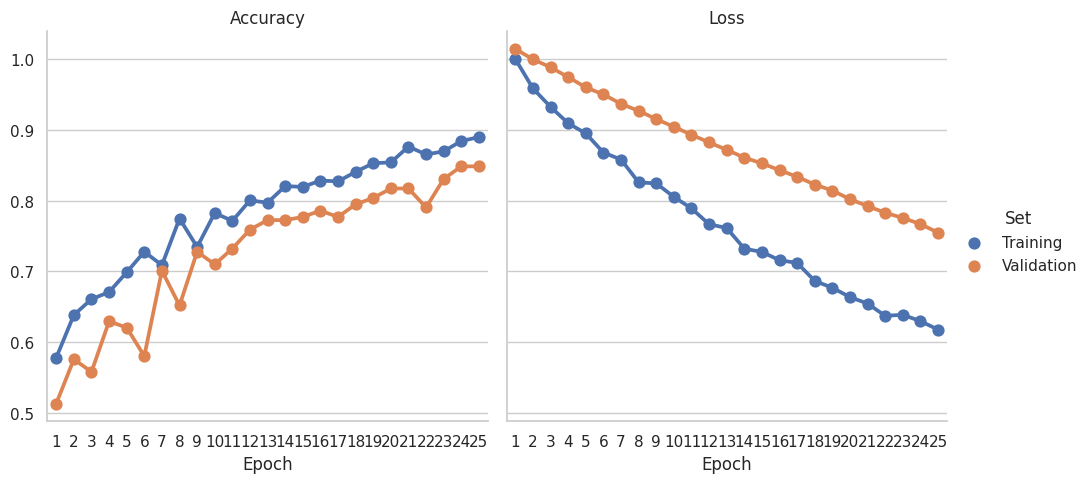

9/9 [==============================] - 1s 84ms/step


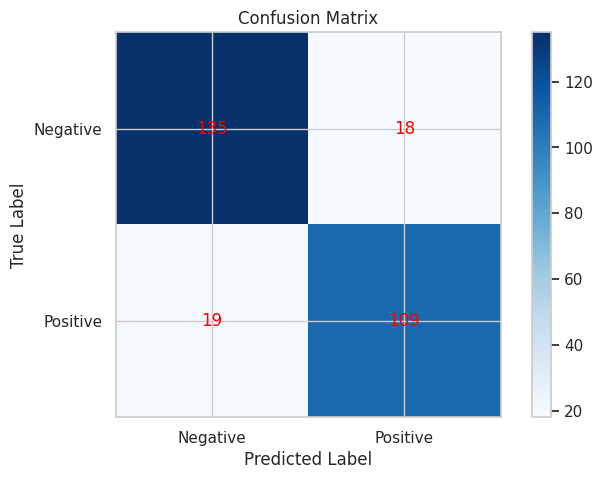

9/9 [==============================] - 0s 45ms/step


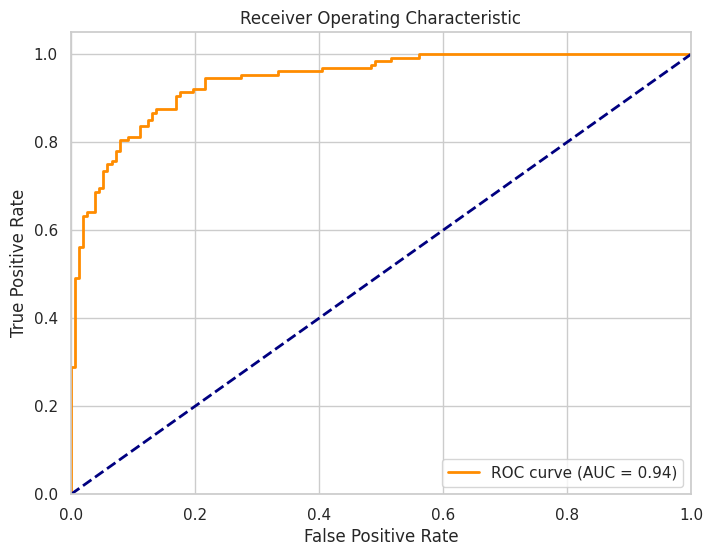

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       153
           1       0.86      0.85      0.85       128

    accuracy                           0.87       281
   macro avg       0.87      0.87      0.87       281
weighted avg       0.87      0.87      0.87       281

[[135  18]
 [ 19 109]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 511, 511, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 255, 255, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 

In [ ]:
from keras.optimizers import Adam
from keras.regularizers import l2

# Build the CNN model
learningRate = 0.00001
smodel = Sequential()
smodel.add(Conv2D(filters=16, kernel_size=(2, 2), input_shape=(512, 512, 3), activation="relu"))
smodel.add(MaxPooling2D((2, 2)))
smodel.add(Dropout(0.2))
smodel.add(Conv2D(filters=32, kernel_size=(2, 2), activation="relu"))
smodel.add(MaxPooling2D((2, 2)))
smodel.add(Dropout(0.2))
smodel.add(Conv2D(filters=64, kernel_size=(2, 2), activation="relu"))
smodel.add(MaxPooling2D((2, 2)))
smodel.add(Dropout(0.2))
smodel.add(Flatten())
smodel.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
smodel.add(Dropout(0.3))
smodel.add(Dense(64, activation="relu", kernel_regularizer=l2(0.001)))
smodel.add(Dropout(0.3))
smodel.add(Dense(2, activation="sigmoid"))

optimizer = Adam(lr=learningRate)

# Compile the model
smodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])



# Implement early stopping with min_delta
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Train the model
batch_size = 75 
epochs = 25
# history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),
#                     callbacks=[early_stopping])
history = smodel.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))
                    


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Extract validation accuracy and loss values from the training history
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

# Create a dataframe to store the accuracy and loss values
data = {'Epoch': list(range(1, len(train_accuracy) + 1)) * 4,
        'Value': train_accuracy + val_accuracy + train_loss + val_loss,
        'Metric': ['Accuracy'] * len(train_accuracy) + ['Accuracy'] * len(val_accuracy) +
                  ['Loss'] * len(train_loss) + ['Loss'] * len(val_loss),
        'Set': ['Training'] * len(train_accuracy) + ['Validation'] * len(val_accuracy) +
               ['Training'] * len(train_loss) + ['Validation'] * len(val_loss)}
df = pd.DataFrame(data)

# Plot the accuracy and loss for both training and validation sets using seaborn
sns.set(style='whitegrid')
g = sns.catplot(x='Epoch', y='Value', hue='Set', col='Metric', data=df, kind='point')
g.set_axis_labels('Epoch', '')
g.set_titles(col_template='{col_name}')

plt.show()

# Make predictions on the test set
y_pred = smodel.predict(X_test)
# y_pred_labels = np.round(y_pred).astype(int).flatten()


y_pred_labels = np.argmax(y_pred, axis=1)
y_test_decoded = np.argmax(y_test, axis=1)

# Plot the confusion matrix for the test set
cm = confusion_matrix(y_test_decoded, y_pred_labels)
plt.figure(figsize=(8, 5))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i][j], ha='center', va='center', color='red')
plt.show()

from sklearn.metrics import roc_curve, auc

# Make predictions on the test set
y_pred = smodel.predict(X_test)
y_pred_probs = y_pred[:, 1]  # Probability of positive class

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test_decoded, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(classification_report(y_test_decoded, y_pred_labels))

# Print the confusion matrix
print(confusion_matrix(y_test_decoded, y_pred_labels))




print(smodel.summary())

import pandas as pd

# Create a dataframe with columns for prediction and ground truth
df = pd.DataFrame({'Prediction': y_pred_labels, 'Ground Truth': y_test_decoded})

# Display the dataframe
print(df)




In [ ]:
# from keras.regularizers import l2
# def cconstruct_model(learningRate):
#     # learningRate = 0.00001
#     smodel = Sequential()
#     smodel.add(Conv2D(filters=16, kernel_size=(2, 2), input_shape=(512, 512, 3), activation="relu"))
#     smodel.add(MaxPooling2D((2, 2)))
#     smodel.add(Dropout(0.2))
#     smodel.add(Conv2D(filters=32, kernel_size=(2, 2), activation="relu"))
#     smodel.add(MaxPooling2D((2, 2)))
#     smodel.add(Dropout(0.2))
#     smodel.add(Conv2D(filters=64, kernel_size=(2, 2), activation="relu"))
#     smodel.add(MaxPooling2D((2, 2)))
#     smodel.add(Dropout(0.2))
#     smodel.add(Flatten())
#     smodel.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
#     smodel.add(Dropout(0.3))
#     smodel.add(Dense(64, activation="relu", kernel_regularizer=l2(0.001)))
#     smodel.add(Dropout(0.3))
#     smodel.add(Dense(2, activation="sigmoid"))


#     optimizer = Adam(lr=learningRate)

#     # Compile the model
#     smodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     smodel.summary()
#     return smodel
# model=cconstruct_model(0.001)
# from keras.utils import plot_model

# # Save the model architecture as a png file
# plot_model(model, to_file='model.png')




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 511, 511, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 255, 255, 16)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 255, 255, 16)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 127, 127, 32)     

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
